<a href="https://colab.research.google.com/github/kit-v4399/229351-StatisticalLearning/blob/main/SIX_of_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

print(X)
print(y)

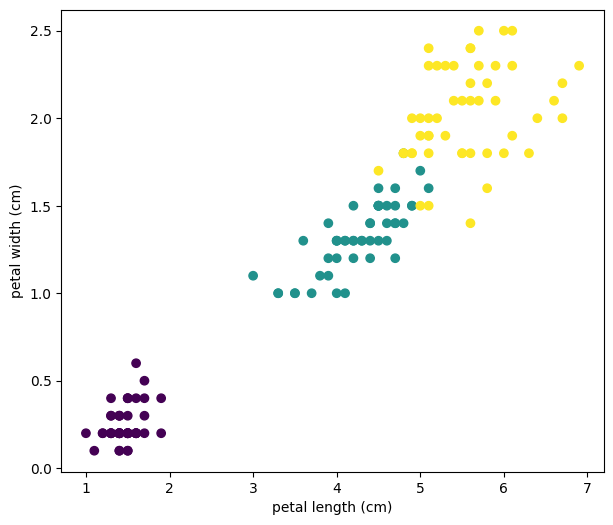

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [12]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

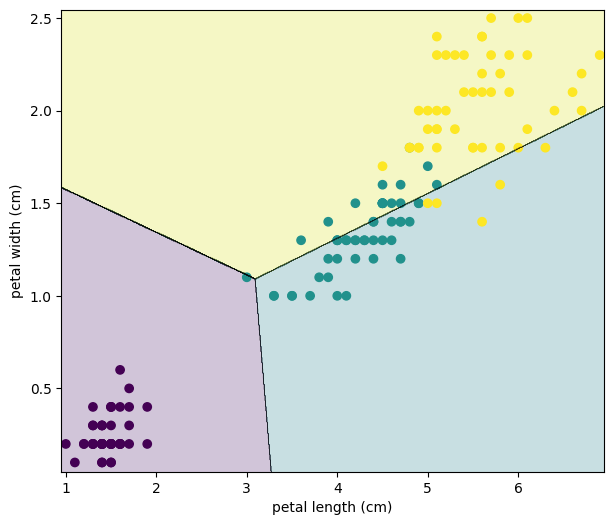

In [13]:
linsvm = LinearSVC(C=0.1)
linsvm.fit(X_train, y_train)
plot_decision_boundary(linsvm, X, y)

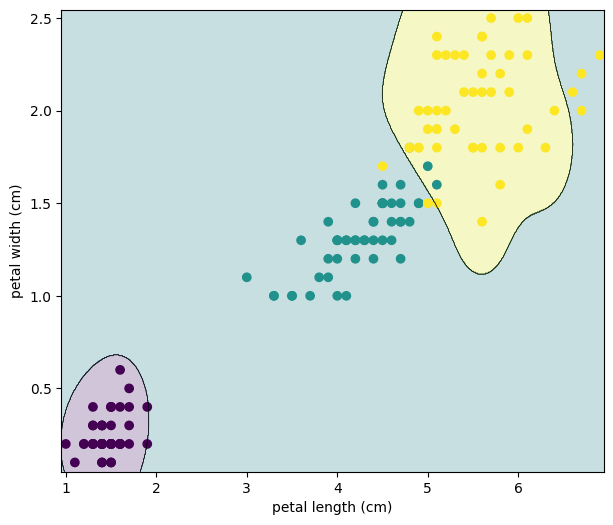

In [14]:
svm = SVC(C=0.1, kernel='rbf', gamma=10)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


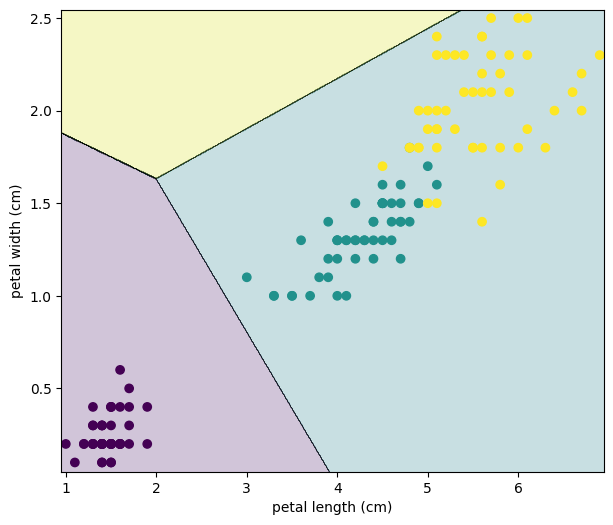

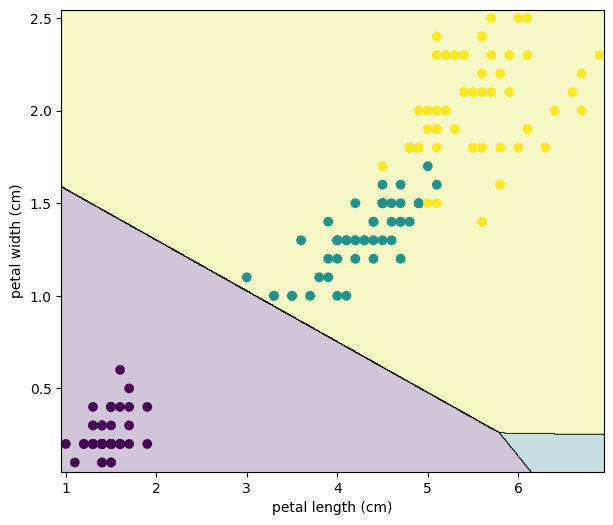

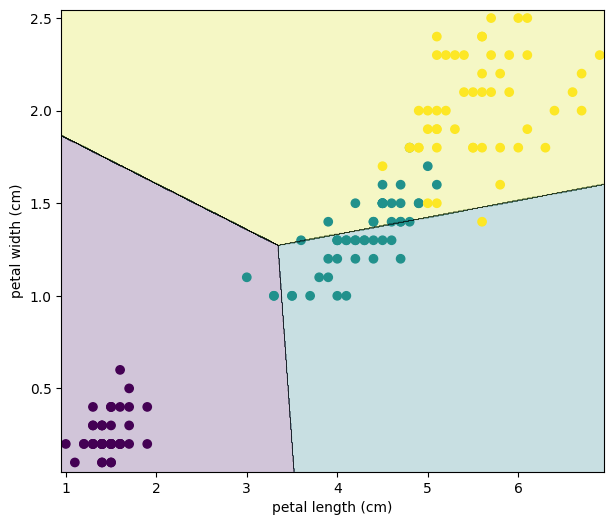

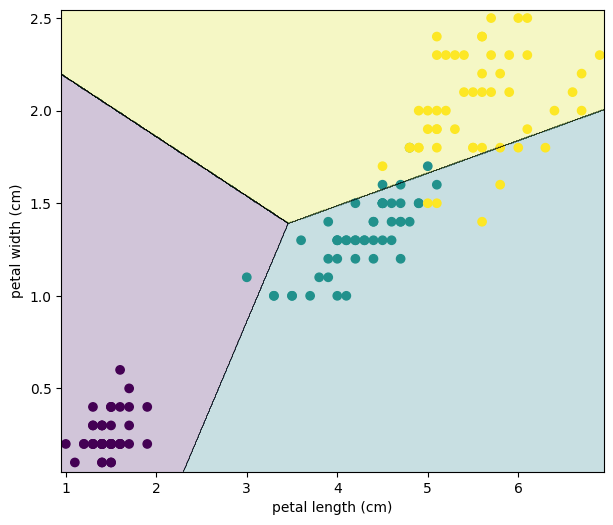

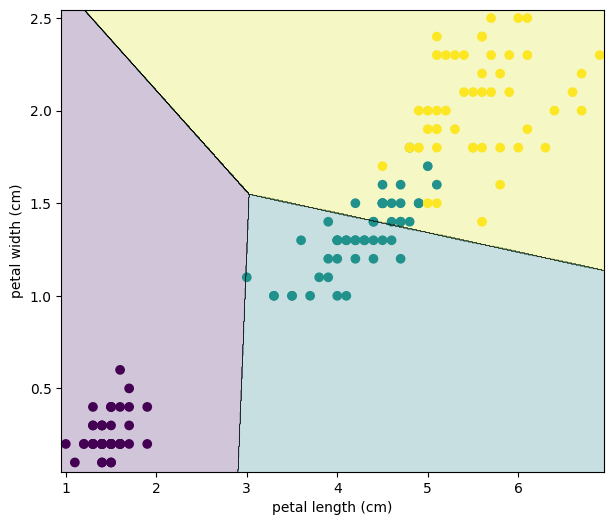

In [15]:
#TODO
for i in [0.01, 0.1, 1.0, 10.0, 100.0]:
    linsvm = LinearSVC(C=i, loss='hinge')
    linsvm.fit(X_train, y_train)
    plot_decision_boundary(linsvm, X, y)

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


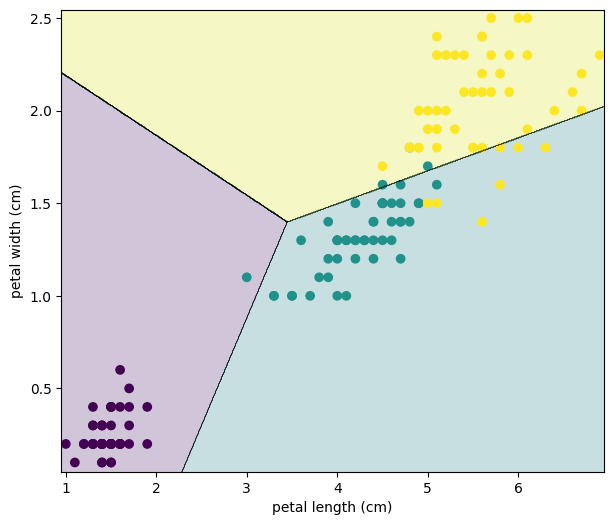

In [16]:
#TODO
linsvm = LinearSVC(C=10.0, loss='hinge')
linsvm.fit(X_train, y_train)
plot_decision_boundary(linsvm, X, y)

In [17]:
accuracy = linsvm.score(X_test, y_test)
test_error = 1 - accuracy

print(f"Test Error: {test_error:.4f}")

Test Error: 0.0889


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

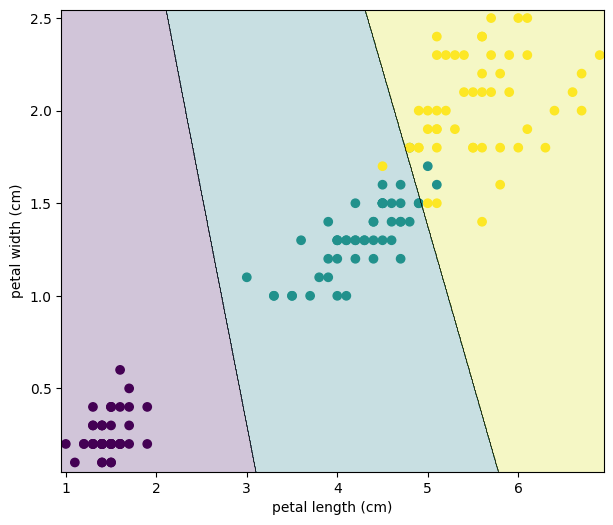

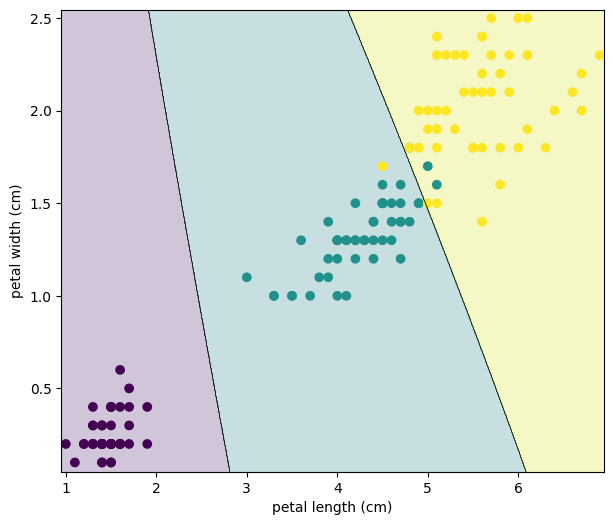

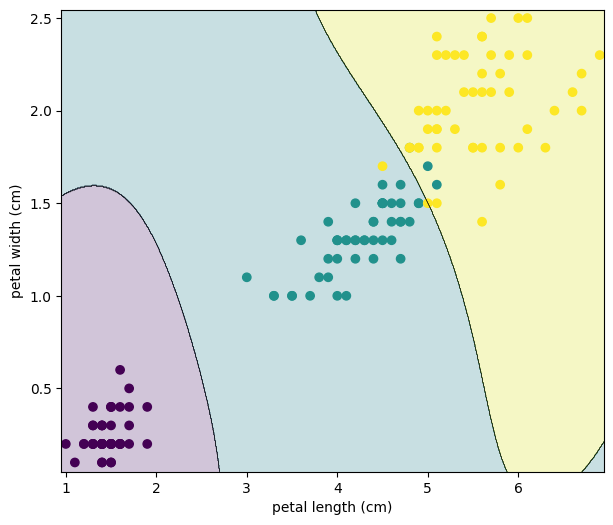

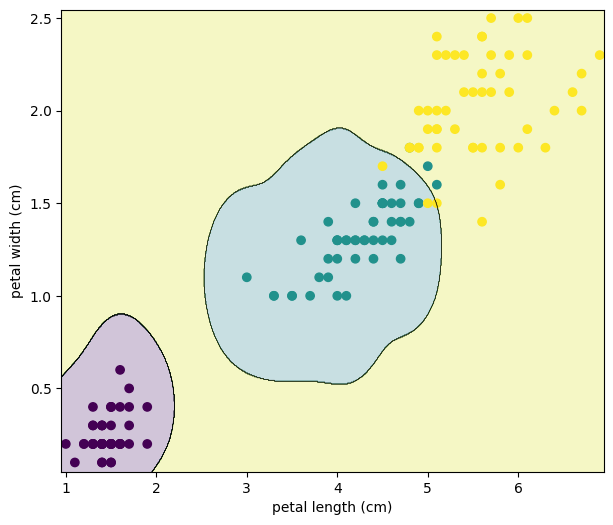

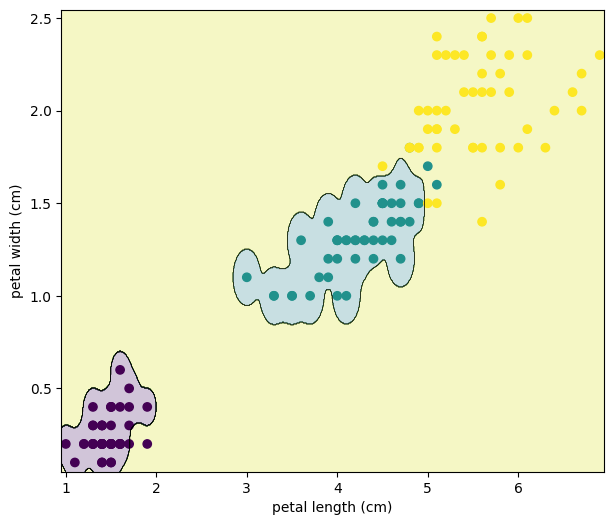

In [18]:
#TODO
for i in [0.01, 0.1, 1.0, 10.0, 100.0]:
  svm = SVC(C=1.0, kernel='rbf', gamma=i)
  svm.fit(X_train, y_train)
  plot_decision_boundary(svm, X, y)

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

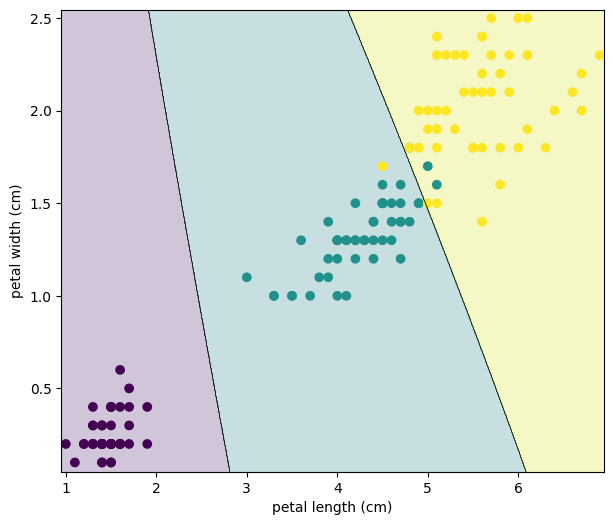

In [19]:
#TODO
svm = SVC(C=1.0, kernel='rbf', gamma=0.1)
svm.fit(X_train, y_train)
plot_decision_boundary(svm, X, y)

In [20]:
test_error = 1 - svm.score(X_test, y_test)
print(f"Test Error: {test_error:.4f}")

num_support_vectors = svm.support_vectors_.shape[0]
print(f"Number of Support Vectors: {num_support_vectors}")

Test Error: 0.0444
Number of Support Vectors: 42


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [21]:
#TODO
linsvm_acc = linsvm.score(X_test, y_test)
svm_acc = svm.score(X_test, y_test)
print(f"Linear SVM Accuracy: {linsvm_acc:.4f}")
print(f"Kernel SVM Accuracy: {svm_acc:.4f}")

Linear SVM Accuracy: 0.9111
Kernel SVM Accuracy: 0.9556


จาก accuracy score จะพบว่าโมเดล Kernel SVM จะเป็นโมเดลที่เหมาะสมกว่าสำหรับข้อมูลนี้เนื่องจากมีค่า accuracy ที่ 95.56% ซึ่งมากกว่าโมเดล Linear SVM

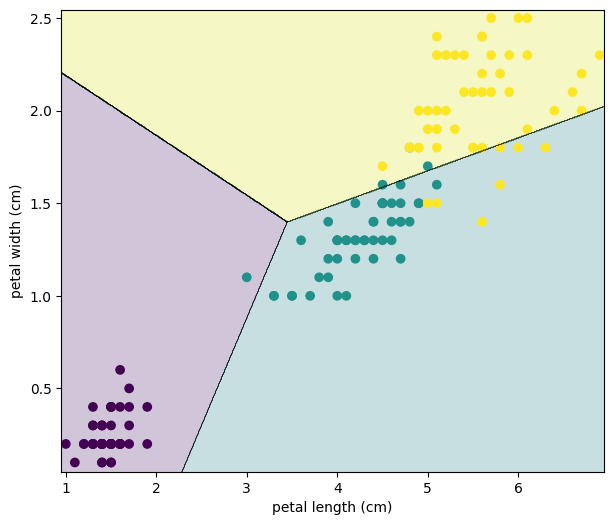

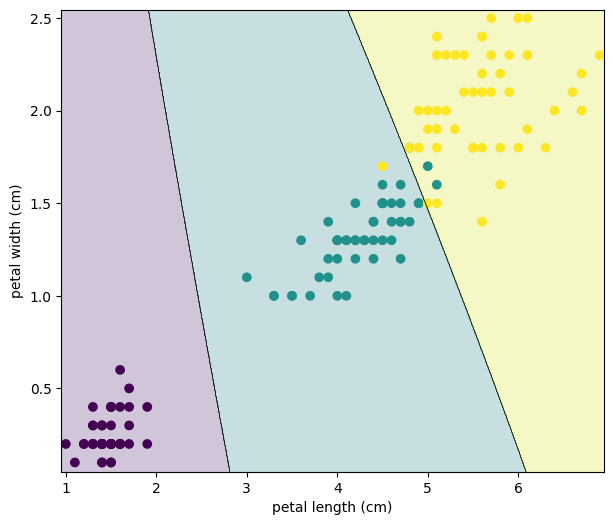

In [22]:
plot_decision_boundary(linsvm, X, y)
plot_decision_boundary(svm, X, y)

จากภาพจะพบว่าโมเดล Kernel SVM สามารถแยกกลีบดอกไม้ทั้ง 3 ชนิดได้ดีกว่าแบบ Linear SVM เนื่องจากโมเดลทำนายผิดไปเพียง 5 ดอก ต่างจากโมเดล Linear SVM ที่ทำนายผิดไป 7 ดอก รวมถึงดูได้จากพื้นที่การแบ่งประเภทกลับดอกไม้แต่ละประเภท